In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfh = pd.read_csv('./data/[1h]BTCUSDT.csv')
dfm = pd.read_csv('./data/[1m]BTCUSDT.csv')

In [3]:
x = pd.to_datetime(dfh['Stop'].to_numpy(), unit='ms').to_numpy()
y = dfh['Close'].to_numpy()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


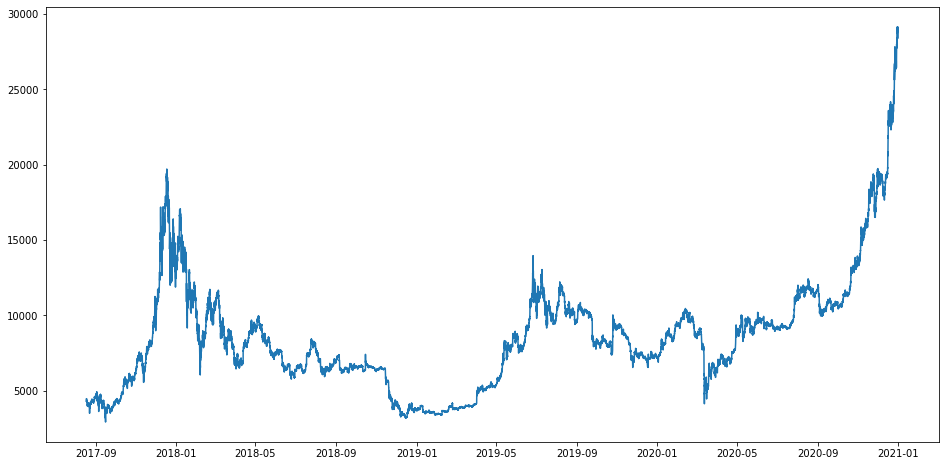

In [4]:
plt.figure(figsize=(16, 8))
plt.plot(x, y)

# Autoregression (AR)

In [6]:
from statsmodels.tsa.ar_model import AutoReg

In [8]:
model = AutoReg(y, lags=1)
model_fit = model.fit()

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [9]:
yhat = model_fit.predict(0, len(y) + 1000)

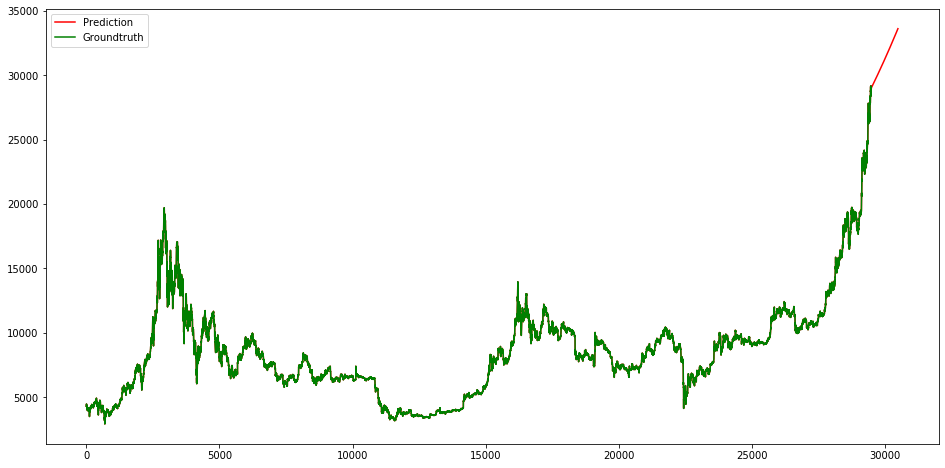

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(yhat)), yhat, c='red', label='Prediction')
plt.plot(range(len(y)), y, c='green', label='Groundtruth')
plt.legend()
plt.show()

# Moving Average (MA)

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
model = ARIMA(y, order=(0, 0, 1))
model_fit = model.fit()

In [13]:
yhat = model_fit.predict(0, len(y) + 1000)

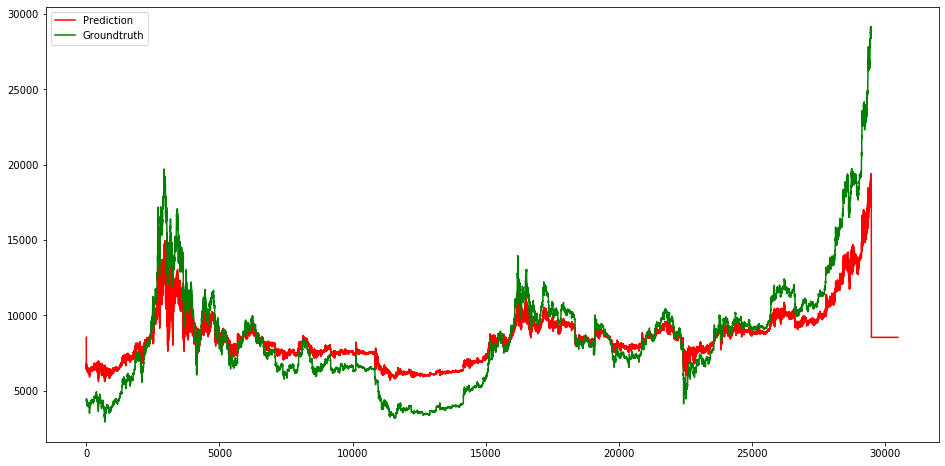

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(yhat)), yhat, c='red', label='Prediction')
plt.plot(range(len(y)), y, c='green', label='Groundtruth')
plt.legend()
plt.show()

# Simple Exponential Smoothing (SES)

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [16]:
model = SimpleExpSmoothing(y)
model_fit = model.fit()

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [17]:
yhat = model_fit.predict(0, len(y) + 5000)

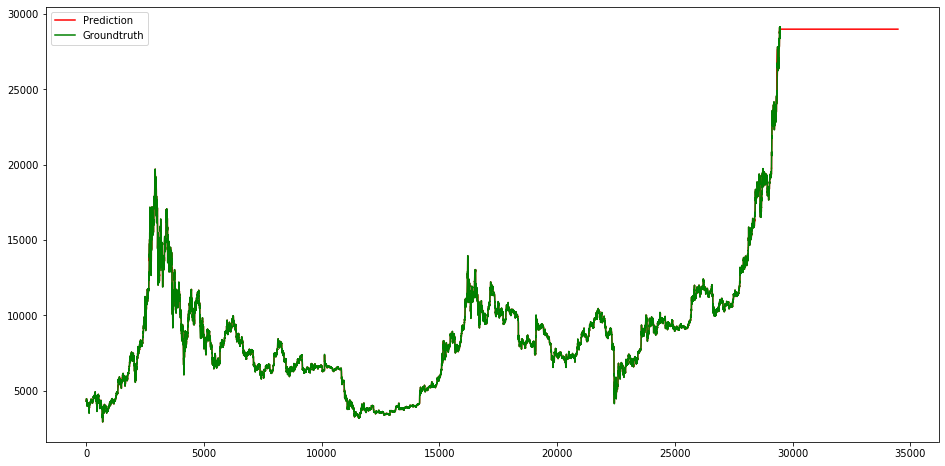

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(yhat)), yhat, c='red', label='Prediction')
plt.plot(range(len(y)), y, c='green', label='Groundtruth')
plt.legend()
plt.show()

# Holt Winter’s Exponential Smoothing (HWES)

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
model = ExponentialSmoothing(y)
model_fit = model.fit()

In [21]:
yhat = model_fit.predict(0, len(y) + 1000)

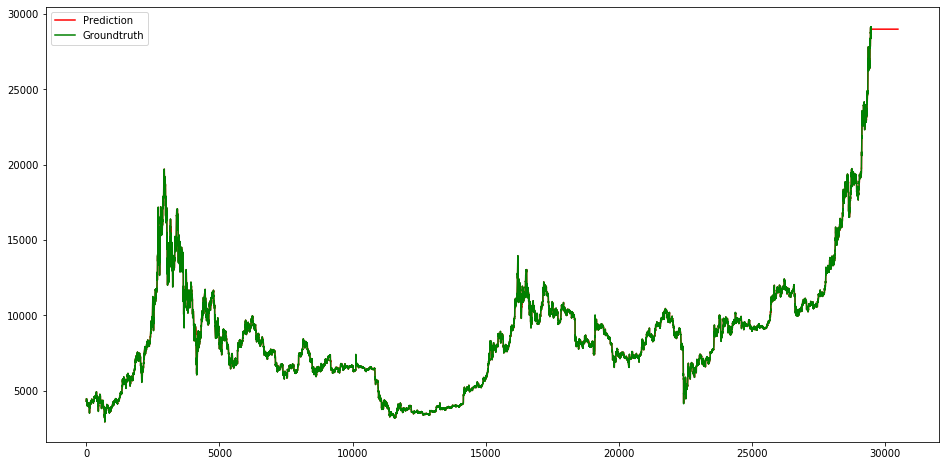

In [22]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(yhat)), yhat, c='red', label='Prediction')
plt.plot(range(len(y)), y, c='green', label='Groundtruth')
plt.legend()
plt.show()